## **SCORING - Vitamin E: Workflow 6.1 with decoys**
#### **Micha Birklbauer 2021-08-17**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Halogen_Bond:ILE126B,Hydrogen_Bond:TYR383B,Hydrogen_Bond:CYS99B,Hydrophobic_Interaction:ASP166B,Hydrogen_Bond:HIS130B,Hydrophobic_Interaction:LEU135B,Hydrogen_Bond:GLY105B,Hydrophobic_Interaction:LEU66B,...,Halogen_Bond:HIS624B,Hydrophobic_Interaction:LYS133B,Salt_Bridge:LYS133B,Halogen_Bond:TYR100B,Pi-Cation_Interaction:ARG138B,Hydrophobic_Interaction:HIS130B,Hydrophobic_Interaction:ILE167B,Hydrophobic_Interaction:ARG112B,Hydrophobic_Interaction:ILE126B,LABEL
0,1,CHEMBL1669722|chembl5lox_decoys|sdf|342,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,inactive
1,2,CHEMBL525954|chembl5lox_decoys|sdf|177,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
2,3,CHEMBL3040216|chembl5lox_decoys|sdf|485,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,inactive
3,4,CHEMBL502202|chembl5lox_decoys|sdf|162,0,1,1,1,2,0,0,0,...,0,1,0,0,0,1,0,0,0,inactive
4,5,CHEMBL4525644|chembl5lox_decoys|sdf|146,1,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,CHEMBL2008956|chembl5lox_decoys|sdf|419,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
476,477,CHEMBL2001795|chembl5lox_decoys|sdf|429,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
477,478,CHEMBL232741|chembl5lox_decoys|sdf|82,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
478,479,CHEMBL1990186|chembl5lox_decoys|sdf|431,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(480, 143) 62


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(120, 143) 10


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(150, 143) 9


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Pi-Cation_Interaction:ARG101B,0.696944,0.145161,0.842105
1,2,Hydrogen_Bond:ARG138B,0.604183,0.096774,0.700957
2,3,Hydrophobic_Interaction:VAL107B,0.553480,0.790323,0.236842
3,4,Hydrogen_Bond:VAL110B,0.476154,0.064516,0.540670
4,5,Hydrophobic_Interaction:VAL110B,0.455626,0.596774,0.141148
...,...,...,...,...,...
135,136,Hydrophobic_Interaction:ASP122B,0.002392,0.000000,0.002392
136,137,Halogen_Bond:HIS624B,0.002392,0.000000,0.002392
137,138,Halogen_Bond:TYR100B,0.002392,0.000000,0.002392
138,139,Salt_Bridge:ARG138B,0.001929,0.112903,0.114833


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.9395833333333333
Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.9395833333333333
Key: 0.05, 0.0, 0.0: strat4 Accuracy: 0.9333333333333333
Key: 0.1, 0.0, 0.0: strat4 Accuracy: 0.9333333333333333
Key: 0.15000000000000002, 0.0, 0.0: strat4 Accuracy: 0.9333333333333333


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.15000000000000002, 0.0, 0.0: strat4 Area under the ROC curve: 0.9596002469516901
Key: 0.15000000000000002, 0.05, 0.0: strat4 Area under the ROC curve: 0.9585198333076091
Key: 0.1, 0.05, 0.0: strat4 Area under the ROC curve: 0.958249729896589
Key: 0.1, 0.0, 0.0: strat4 Area under the ROC curve: 0.9574972989658898
Key: 0.15000000000000002, 0.0, 0.0: strat3 Area under the ROC curve: 0.9571307300509339


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.05, 0.1, 0.15000000000000002: strat3 Accuracy: 0.9333333333333333
Key: 0.0, 0.15000000000000002, 0.35000000000000003: strat4 Accuracy: 0.925
Key: 0.0, 0.15000000000000002, 0.4: strat4 Accuracy: 0.925
Key: 0.0, 0.2, 0.35000000000000003: strat4 Accuracy: 0.925
Key: 0.0, 0.2, 0.4: strat4 Accuracy: 0.925


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.05, 0.1, 0.0: strat2 Area under the ROC curve: 0.9036363636363636
Key: 0.05, 0.0, 0.0: strat2 Area under the ROC curve: 0.9031818181818181
Key: 0.05, 0.05, 0.0: strat2 Area under the ROC curve: 0.9031818181818181
Key: 0.05, 0.0, 0.0: strat1 Area under the ROC curve: 0.8927272727272728
Key: 0.05, 0.05, 0.0: strat1 Area under the ROC curve: 0.8927272727272728


In [16]:
features_filtered = get_relevant_features(features, 0.05, 0.1, 0.15000000000000002)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Pi-Cation_Interaction:ARG101B,0.696944,0.145161,0.842105
2,3,Hydrophobic_Interaction:VAL107B,0.553480,0.790323,0.236842
6,7,Hydrophobic_Interaction:LYS133B,0.401682,0.693548,0.291866
13,14,Hydrogen_Bond:ARG101B,0.246334,0.935484,1.181818
14,15,Hydrophobic_Interaction:GLU134B,0.239466,0.806452,0.566986
19,20,Hydrophobic_Interaction:THR137B,0.172866,0.483871,0.311005
24,25,Hydrogen_Bond:ASP166B,0.118382,0.532258,0.413876
25,26,Salt_Bridge:ARG101B,0.116762,0.112903,0.229665
26,27,Hydrophobic_Interaction:TYR142B,0.113289,0.290323,0.177033
29,30,Hydrogen_Bond:THR137B,0.101868,0.161290,0.263158


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrophobic_Interaction:VAL107B',
 'Hydrophobic_Interaction:LYS133B',
 'Hydrophobic_Interaction:GLU134B',
 'Hydrophobic_Interaction:THR137B',
 'Hydrogen_Bond:ASP166B',
 'Hydrophobic_Interaction:TYR142B',
 'Hydrogen_Bond:GLU108B']

In [20]:
negatives

['Pi-Cation_Interaction:ARG101B',
 'Hydrogen_Bond:ARG101B',
 'Salt_Bridge:ARG101B',
 'Hydrogen_Bond:THR137B',
 'Hydrophobic_Interaction:ALA388B',
 'Hydrogen_Bond:HIS130B']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [7, 0.8770833333333333] 
Strategy 2:  [8, 0.8708333333333333] 
Strategy 3:  [4, 0.8770833333333333] 
Strategy 4:  [5, 0.8791666666666667]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 7, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 8, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 5, "accuracy")
)

Strategy 1:  0.8770833333333333 
Strategy 2:  0.8708333333333333 
Strategy 3:  0.8770833333333333 
Strategy 4:  0.8791666666666667


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 7, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 8, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 5, "fpr")
)

Strategy 1:  0.0 
Strategy 2:  0.0023923444976076554 
Strategy 3:  0.03110047846889952 
Strategy 4:  0.004784688995215311


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 7, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 8, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 5, pretty_print = True)
)

Strategy 1:  {'ACC': 0.8770833333333333, 'FPR': 0.0, 'AUC': 0.8066638370118845, 'Ya': 1.0, 'EF': 7.741935483870967, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.8708333333333333, 'FPR': 0.0023923444976076554, 'AUC': 0.7917695632041982, 'Ya': 0.5, 'EF': 3.8709677419354835, 'REF': 50.0} 
Strategy 3:  {'ACC': 0.8770833333333333, 'FPR': 0.03110047846889952, 'AUC': 0.8619578638678809, 'Ya': 0.5517241379310345, 'EF': 4.271412680756396, 'REF': 55.172413793103445} 
Strategy 4:  {'ACC': 0.8791666666666667, 'FPR': 0.004784688995215311, 'AUC': 0.8546650717703349, 'Ya': 0.75, 'EF': 5.806451612903225, 'REF': 75.0}


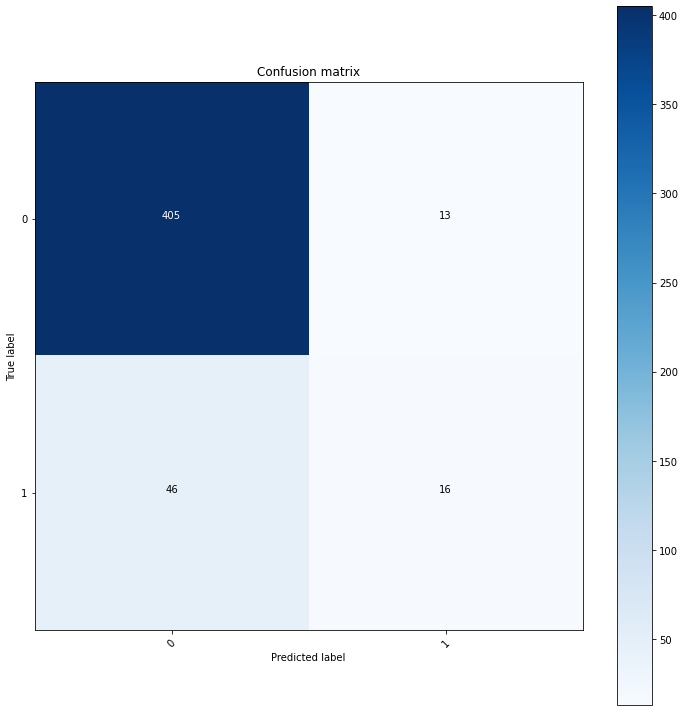

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, 4)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

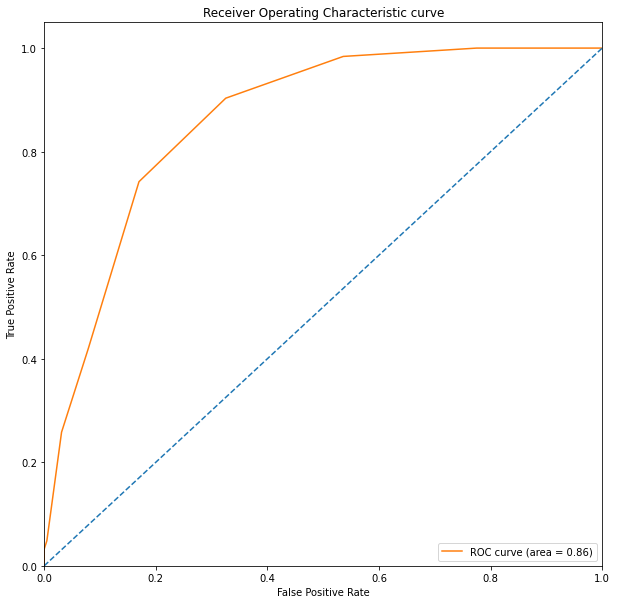

In [29]:
roc = get_metrics(train_result_strat3, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [34]:
print(
"Strategy 1: ",
# get_metrics(val_result_strat1, 7, pretty_print = True),
"\nStrategy 2: ",
# get_metrics(val_result_strat2, 8, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
# get_metrics(val_result_strat4, 5, pretty_print = True)
)

Strategy 1:  
Strategy 2:  
Strategy 3:  {'ACC': 0.9333333333333333, 'FPR': 0.0, 'AUC': 0.7140909090909091, 'Ya': 1.0, 'EF': 12.0, 'REF': 100.0} 
Strategy 4: 


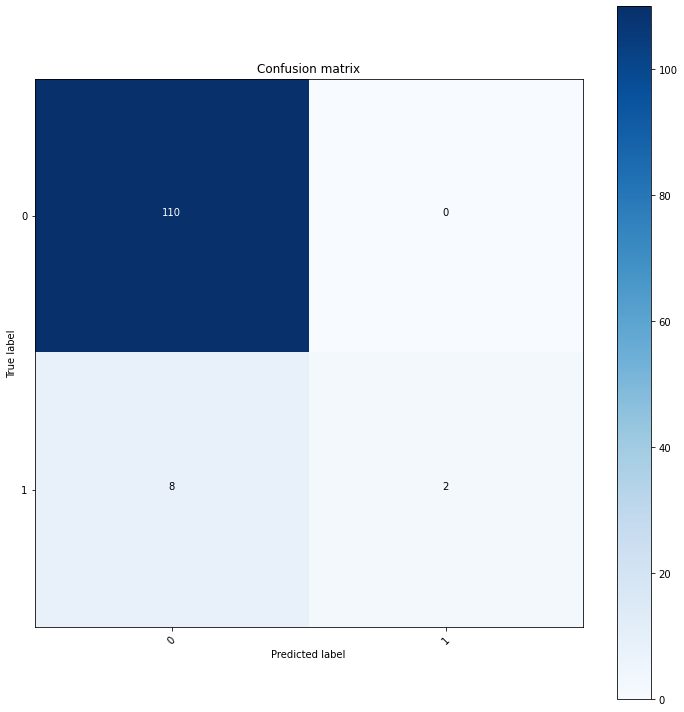

In [35]:
plot_confusion_matrix(get_metrics(val_result_strat3, 4)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

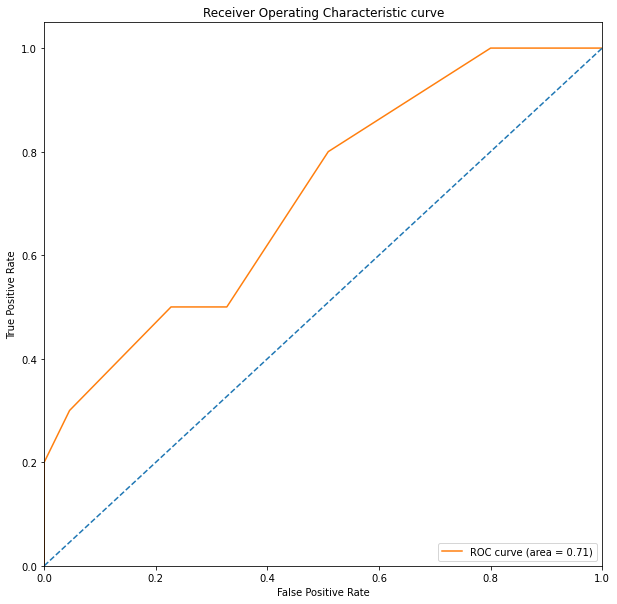

In [36]:
roc = get_metrics(val_result_strat3, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [39]:
print(
"Strategy 1: ",
# get_metrics(test_result_strat1, 7, pretty_print = True),
"\nStrategy 2: ",
# get_metrics(test_result_strat2, 8, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 5, pretty_print = True)
)

Strategy 1:  
Strategy 2:  
Strategy 3:  {'ACC': 0.92, 'FPR': 0.02127659574468085, 'AUC': 0.7100078802206462, 'Ya': 0.0, 'EF': 0.0, 'REF': 0.0} 
Strategy 4:  {'ACC': 0.9333333333333333, 'FPR': 0.0070921985815602835, 'AUC': 0.7194641449960599, 'Ya': 0.0, 'EF': 0.0, 'REF': 0.0}


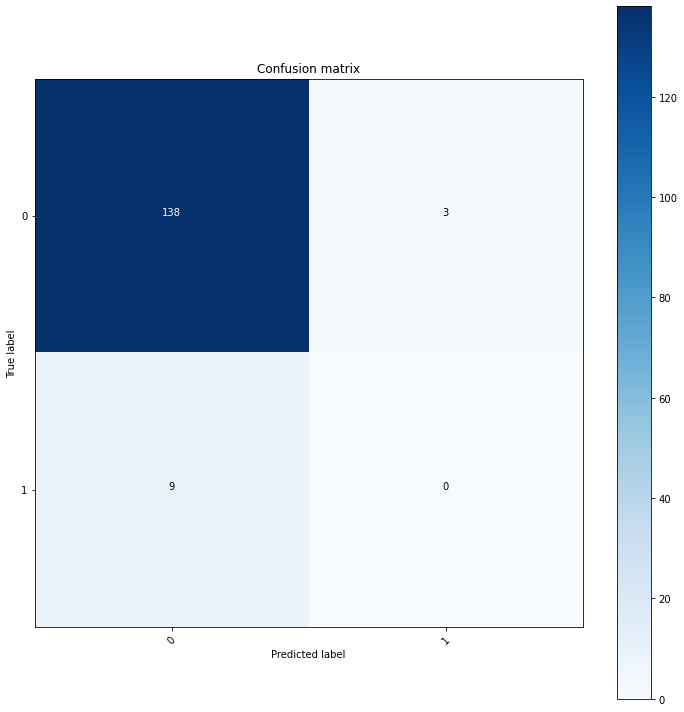

In [40]:
plot_confusion_matrix(get_metrics(test_result_strat3, 4)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

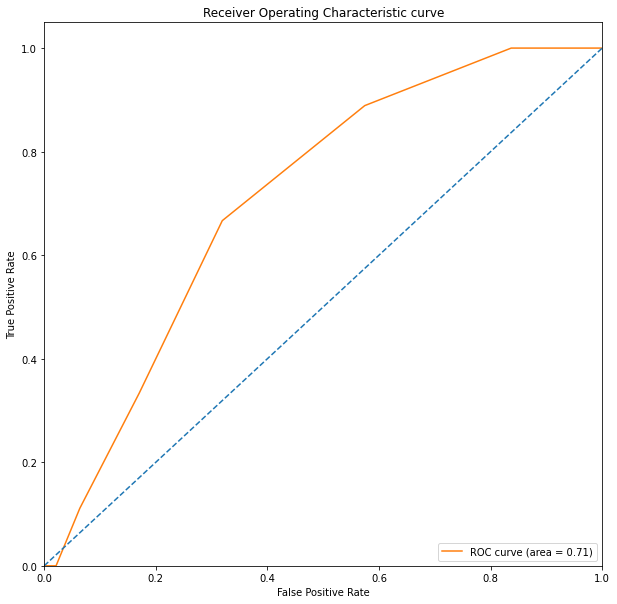

In [41]:
roc = get_metrics(test_result_strat3, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [42]:
os.remove("scoring.py")